In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Table of Contents 
1. Explore scraped data
raw = loaded from jl  
raw2 = removed most announcements, duplicates  
2.  


# Step 1: Read in and check out raw scraped data

In [2]:
raw = pd.read_json('JAS/jas_abstracts2.jl', lines=True, orient='records')

In [3]:
raw.describe()

,Issue,Journal,Pages,Volume,abstract,category,date,doi,title
count,28300,28300,28300,28300,28300,28300,28300,28300,28300
unique,32,1,18660,127,27936,705,734,28300,27255
top,Issue 1,Journal of Animal Science,Pages 1–8,Volume 94,Announcements of available positions and prosp...,Ruminant Nutrition,2016-09-01 00:00:00,https://doi.org/10.2527/jas.2010-3304,News and Notes
freq,4932,28300,23,1195,22,4023,291,1,349
first,NaN,NaN,NaN,NaN,NaN,NaN,1910-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 00:00:00,NaN,NaN


In [4]:
# raw['abstract'].value_counts()[:5] # most common abstracts are not real abstracts - need to filter out

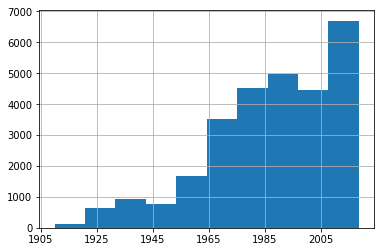

In [5]:
raw['date'].hist() # more recent, more articles - journal got bigger
# also noticed a bunch of old articles were in pdf form and therefore not scraped

In [6]:
raw['category'].value_counts()[:5]

Ruminant Nutrition              4023
Article                         3544
Nonruminant Nutrition           3051
Physiology and Endocrinology    2285
Breeding and Genetics           1716
Name: category, dtype: int64

In [7]:
raw[raw['abstract'].isnull()] # scraped fine!

,Issue,Journal,Pages,Volume,abstract,category,date,doi,title


### Filtering 

Work

In [8]:
# raw[raw['category'].str.contains('Award')].iloc[0,:] # might want to remove award articles

In [9]:
# raw[raw['category'].str.contains('News and Notes')] #also Placement, 
# raw2[raw2['abstract'].str.contains('Announcements')] - need to get rid of new books

In [10]:
#raw[raw['category'].str.contains('OTHER')] # has some real articles but mostly announcements
#keep for now and see if it gets naturally filtered
# raw2[raw2['abstract'].str.contains('Announcements of available positions')]

Actual 

In [11]:
# remove categpies
cat_mask = raw['category'].str.contains(r'News and Notes|Placement|New Books')
raw2 = raw[~cat_mask]

raw2.describe()

,Issue,Journal,Pages,Volume,abstract,category,date,doi,title
count,28020,28020,28020,28020,28020,28020,28020,28020,28020
unique,32,1,18460,127,27707,702,734,28020,27255
top,Issue 1,Journal of Animal Science,Pages 1–8,Volume 94,This paper is not available for publication.,Ruminant Nutrition,2016-09-01 00:00:00,https://doi.org/10.2527/jas.2010-3304,News and Notes
freq,4889,28020,23,1195,7,4023,291,1,220
first,NaN,NaN,NaN,NaN,NaN,NaN,1910-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 00:00:00,NaN,NaN


In [12]:
abs_mask = raw2['abstract'].str.contains('This paper is not available')
title_mask = raw2['title'].isin(['Placement', 'News and Notes'])


In [13]:
raw2 = raw2.loc[~abs_mask]
len(raw2)

28013

In [14]:
raw2 = raw2.loc[~title_mask]

In [15]:
len(raw2)

27719

In [16]:
raw2 = raw2.drop_duplicates(subset='abstract', keep='first')

In [17]:
raw2.describe()

,Issue,Journal,Pages,Volume,abstract,category,date,doi,title
count,27421,27421,27421,27421,27421,27421,27421,27421,27421
unique,32,1,18246,127,27421,702,734,27421,27242
top,Issue 1,Journal of Animal Science,Pages 1–8,Volume 94,Skeletal muscle fibers are elongated multinucl...,Ruminant Nutrition,2016-09-01 00:00:00,https://doi.org/10.2527/jas.2010-3304,Discussion
freq,4716,27421,23,1194,1,4008,291,1,31
first,NaN,NaN,NaN,NaN,NaN,NaN,1910-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 00:00:00,NaN,NaN


In [18]:
# abstracts now look unique
raw2['abstract'].value_counts()[:2]

Skeletal muscle fibers are elongated multinucleated cells. Along its length, an individual fiber may contain thousands of myonuclei, each controlling protein synthesis within its surrounding cytoplasm. Therefore, a fiber can be considered to be a series of myonuclear domains, each responding to distinct localized signaling mechanisms that may result in differential gene expression within the fiber. This brief review examines phenomena that produce distinct subsets of proteins within different regions of a muscle fiber. These include changes in protein expression associated with activity-induced fiber-type transformation, muscle development, and denervation. Myosin heavy-chain (MyHC) proteins are fundamental structural and functional components of the muscle fiber. They are represented by different isoforms, each of which is the product of a separate gene that may be differentially expressed during the development of distinct muscle fiber types. We have found that in mature chicken and 

In [19]:
# too short - probably not an abstract, 100 + start to have more real abstracts
len_mask = raw2['abstract'].str.len() < 100 
raw3 = raw2[~len_mask]
print(len(raw3))

27412


In [20]:
# raw3[raw3['abstract'].str.contains('Bulletin')] 
# # more non abstracts but too impure to easily filter - see if gets separated when topic modeling

In [21]:
raw3.to_pickle('abstracts1.pkl') # cleaner abstracts

# Step 2: Basic Tokenizer

In [22]:
#isolate abstract text from meta features
abstracts1 = raw3['abstract']

Work

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

def basic_tokenizer(text):

    # remove punctuation
    remove_punct = str.maketrans('', '', string.punctuation)
    text = text.translate(remove_punct)

    # remove digits and convert to lower case
    remove_digits = str.maketrans('', '', string.digits)
    text = text.lower().translate(remove_digits)

    # tokenize
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = stopwords.words('english')
    JAS_words = ['use', 'model', 'anim', 'method', 'result']
    stop_words.extend(JAS_words)
    tokens_stop = [y for y in tokens if y not in stop_words]

    # stem
    stemmer = SnowballStemmer('english')
    tokens_stem = [stemmer.stem(y) for y in tokens_stop] 

    return tokens_stem

In [24]:
abstracts2 = abstracts1.sample(3000) # train on a 10% sample

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora, models, similarities, matutils

def vec_and_lda(corpus, tokenizer):
    '''Input: List of documents
       Output: LDA model trained and transformed on input corpus
'''
    # countvectorizing and training
    cv = CountVectorizer(tokenizer=tokenizer, max_df=0.9)
    X_train_cv = cv.fit(corpus)
    
    # Create the term-document matrix
    # Transpose it so the terms are the rows
    counts = cv.transform(corpus).transpose()
    
    # gensim
    
    # Convert sparse matrix of counts to a gensim corpus
    corpus = matutils.Sparse2Corpus(counts)
    id2word = dict((v, k) for k, v in cv.vocabulary_.items())
    
    # Create lda model (equivalent to "fit" in sklearn)
    lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10)
    return lda

In [26]:
# lda.get_topic_terms(1)

### Detour: Try topic modeling on just titles 
Doesn't look too promising

In [27]:
titles1 = raw2['title']

In [28]:
# from sklearn.decomposition import LatentDirichletAllocation - no innate word coefficients

In [29]:
title_lda = vec_and_lda(titles1, basic_tokenizer)


In [30]:
title_lda.print_topics()[:3]

[(0,
  '0.048*"activ" + 0.037*"certain" + 0.033*"cycl" + 0.033*"treatment" + 0.026*"estrous" + 0.021*"embryo" + 0.021*"vitro" + 0.021*"uterin" + 0.019*"rat" + 0.018*"bovin"'),
 (1,
  '0.061*"vitamin" + 0.036*"various" + 0.025*"swine" + 0.025*"ration" + 0.023*"fatten" + 0.023*"three" + 0.021*"cattl" + 0.021*"feed" + 0.020*"lamb" + 0.019*"slaughter"'),
 (2,
  '0.100*"effect" + 0.057*"growth" + 0.057*"perform" + 0.032*"lamb" + 0.028*"pig" + 0.025*"dietari" + 0.025*"characterist" + 0.023*"serum" + 0.021*"blood" + 0.020*"carcass"')]

### Try Nonnegative matrix factorization (NMF)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

def cvec_and_nmf(corpus, tokenizer, components=20):
    '''*Input* 
    corpus: List of documents
    tokenizer: func, tokenizer function
    components: int, number of components to use
       Output: tuple(vocab, nmf model, Nxk matrix)
    '''
    # countvectorizing and training
    cv = CountVectorizer(tokenizer=tokenizer, max_df=0.9)
    X_train_cv = cv.fit_transform(corpus)
    vocab = dict((v, k) for k, v in cv.vocabulary_.items())
    nmf = NMF(n_components=components)
    nmf_vecs = nmf.fit_transform(X_train_cv)
    return vocab, nmf, nmf_vecs

In [32]:
abstracts_vocab, abstracts_nmf, abstracts_vecs = cvec_and_nmf(abstracts1, basic_tokenizer)

In [33]:
km = abstracts_nmf.components_
km.shape
# each component has a vector that contains the weight of each word in the vocab

(20, 71206)

In [34]:
# Pick out the words with the top 10 weights within each component 
nmf_topic_words = [topic[:10] for topic in np.argsort(-km)]

In [35]:
for component in nmf_topic_words:
     print([abstracts_vocab[idx].strip() for idx in component])

['p', 'lt', 'greater', 'treatment', 'bw', 'gt', 'vs', '×', 'compar', 'effect']
['genet', 'anim', 'use', 'effect', 'trait', 'estim', 'select', 'breed', 'correl', 'studi']
['diet', 'fed', 'contain', 'dietari', 'meal', 'corn', 'cp', 'exp', 'ad', 'soybean']
['pig', 'fed', 'kg', 'growth', 'perform', 'adg', 'pen', 'compar', 'bw', 'per']
['±', 'kg', 'vs', 'respect', 'bw', 'b', 'mean', '−', 'age', 'hs']
['weight', 'birth', 'wean', 'gain', 'kg', 'age', 'signific', 'bodi', 'litter', 'dam']
['cow', 'milk', 'product', 'beef', 'postpartum', 'lactat', 'calf', 'bcs', 'estrus', 'pregnanc']
['lamb', 'ewe', 'breed', 'ram', 'wean', 'fed', 'birth', 'born', 'per', 'product']
['steer', 'fed', 'kg', 'cattl', 'corn', 'greater', 'gain', 'finish', 'graze', 'treatment']
['feed', 'intak', 'gain', 'effici', 'daili', 'period', 'level', 'fed', 'energi', 'ad']
['increas', 'decreas', 'level', 'linear', 'dietari', 'effect', 'quadrat', 'rate', 'product', 'chang']
['sow', 'lactat', 'litter', 'piglet', 'wean', 'gestat', '

In [36]:
# look at the corresponding weights 
[-topic[:10] for topic in np.sort(-km)]

[array([37.7528041 , 21.61861187,  3.46464979,  2.84118237,  2.56891606,
         2.4803145 ,  1.76134678,  1.69634483,  1.62802488,  1.21836107]),
 array([8.41599171, 8.26027282, 8.22073547, 6.89815572, 6.50806118,
        6.50111479, 6.04327269, 5.20155926, 4.42903413, 4.08188611]),
 array([23.27151176,  8.71536437,  2.46592999,  2.22154927,  1.90604718,
         1.32019595,  1.14659803,  1.02268342,  0.98165233,  0.95239104]),
 array([24.33701856,  3.05021302,  2.49539112,  1.57439607,  1.5234304 ,
         1.51778418,  1.50980807,  1.29886361,  1.20430803,  1.15668182]),
 array([25.46419717,  1.94448778,  1.90689468,  1.8660685 ,  1.48368898,
         1.13821578,  0.879752  ,  0.70425085,  0.65336069,  0.59601894]),
 array([20.53273571,  4.21393724,  3.53938651,  3.53462948,  3.1310848 ,
         2.72539945,  2.51717108,  2.48439409,  2.27946716,  2.02394182]),
 array([20.38372414,  2.91774997,  1.51568176,  1.50425105,  1.38130319,
         1.30840783,  1.27428055,  1.22736456,  1

In [37]:
string.punctuation + '±−'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~±−'

In [38]:
# # NMF with titles
# titles_vocab, titles_nmf, titles_vecs = cvec_and_nmf(titles1)
# titles_km = titles_nmf.components_
# titles_topic_words = [topic[:10] for topic in np.argsort(-titles_km)]
# for i in range(20):
#      print([titles_vocab[idx].strip() for idx in titles_topic_words[i]])

# Step 3: Noun tokenizer
Tokenize but keep only nouns  
a. CV + LDA  
b. CV + NMF  
c. TFIDf + NMF  

In [39]:
#  nouns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from nltk.tag import pos_tag

def noun_tokenizer(text):

    # remove punctuation
    punct = string.punctuation + '±−≤'
    remove_punct = str.maketrans('', '', punct)
    text = text.translate(remove_punct)

    # remove digits and convert to lower case
    remove_digits = str.maketrans('', '', string.digits)
    text = text.lower().translate(remove_digits)

    # tokenize
    tokens = word_tokenize(text)

    is_noun = lambda pos: (pos == 'NN') | (pos == 'NNS') #only nouns - no proper nouns
    nouns = [word for (word, pos) in pos_tag(tokens) if is_noun(pos)]
    # remove stop words
    stop_words = stopwords.words('english')
    JAS_words = ['use', 'model', 'anim', 'method', 'result', 'kg', 'vs', 'treatment', 'mgkg', 'per', 'h', 'x']
    stop_words.extend(JAS_words)
    tokens_stop = [y for y in nouns if y not in stop_words]

    # stem
    #stemmer = SnowballStemmer('english')
    #tokens_stem = [stemmer.stem(y) for y in tokens_stop] 

    return tokens_stop

In [40]:
%time noun_abstract_lda = vec_and_lda(abstracts1, noun_tokenizer)

CPU times: user 40min 17s, sys: 10.8 s, total: 40min 28s
Wall time: 39min 13s


In [41]:
for i in range(20):
    print(noun_abstract_lda.print_topic(i))

0.027*"tissue" + 0.025*"cells" + 0.022*"growth" + 0.020*"activity" + 0.020*"muscle" + 0.019*"cell" + 0.015*"expression" + 0.014*"development" + 0.013*"protein" + 0.010*"gene"
0.062*"lambs" + 0.059*"ewes" + 0.041*"weight" + 0.023*"birth" + 0.023*"age" + 0.022*"plt" + 0.019*"weights" + 0.017*"rate" + 0.016*"rams" + 0.013*"days"
0.047*"days" + 0.045*"gilts" + 0.040*"day" + 0.023*"group" + 0.022*"temperature" + 0.020*"time" + 0.019*"hr" + 0.018*"plt" + 0.018*"groups" + 0.016*"rate"
0.122*"heifers" + 0.065*"estrus" + 0.050*"progesterone" + 0.031*"pregnancy" + 0.029*"cycle" + 0.026*"ovulation" + 0.019*"puberty" + 0.017*"days" + 0.016*"day" + 0.016*"lh"
0.039*"university" + 0.026*"horses" + 0.025*"state" + 0.024*"science" + 0.016*"students" + 0.012*"sulfur" + 0.011*"degree" + 0.011*"college" + 0.011*"waste" + 0.009*"professor"
0.027*"semen" + 0.026*"muscle" + 0.024*"meat" + 0.021*"quality" + 0.021*"tenderness" + 0.019*"p" + 0.017*"muscles" + 0.017*"steaks" + 0.016*"lt" + 0.016*"color"
0.101*"

In [42]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = cvec_and_nmf(abstracts1, noun_tokenizer)


CPU times: user 17min 29s, sys: 4.34 s, total: 17min 34s
Wall time: 16min 53s


In [43]:
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for component in nmf_topic_words:
     print([abstracts_vocab[idx].strip() for idx in component])

['p', 'bw', 'gt', 'treatments', 'supplementation', 'study', 'con', 'effects', 'effect', 'n']
['pigs', 'growth', 'performance', 'pig', 'bw', 'adg', 'control', 'treatments', 'gf', 'diet']
['weight', 'birth', 'body', 'gain', 'weights', 'effects', 'traits', 'litter', 'size', 'breed']
['diets', 'diet', 'digestibility', 'meal', 'cp', 'dm', 'performance', 'aa', 'control', 'source']
['cows', 'milk', 'cow', 'beef', 'pregnancy', 'estrus', 'bcs', 'postpartum', 'calf', 'dairy']
['steers', 'cattle', 'treatments', 'bw', 'feedlot', 'beef', 'performance', 'dmi', 'adg', 'forage']
['day', 'days', 'plt', 'group', 'groups', 'control', 'period', 'estrus', 'levels', 'time']
['heifers', 'pregnancy', 'estrus', 'bw', 'treatments', 'beef', 'rates', 'heifer', 'puberty', 'rate']
['protein', 'meal', 'levels', 'level', 'nitrogen', 'cp', 'crude', 'amino', 'n', 'muscle']
['calves', 'calf', 'dams', 'birth', 'milk', 'hereford', 'breed', 'castration', 'feedlot', 'performance']
['feed', 'intake', 'energy', 'gain', 'effic

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

def tfidf_and_nmf(corpus, tokenizer, components=20, max_df=0.9):
    '''*Input*
    corpus: List of documents,
    tokenizer: tokenize function,
    components: int, number of components to use,
    max_df: float, threshold to ignore terms
    
    *Output*
    tuple(vocab, nmf model, Nxk matrix)
   '''
    # countvectorizing and training
    tfidf = TfidfVectorizer(tokenizer=tokenizer, max_df=max_df)
    X_train_tfidf = tfidf.fit_transform(corpus)
    vocab = dict((v, k) for k, v in tfidf.vocabulary_.items())
    nmf = NMF(n_components=components)
    nmf_vecs = nmf.fit_transform(X_train_tfidf)
    return vocab, nmf, nmf_vecs

In [45]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = tfidf_and_nmf(abstracts1, noun_tokenizer)
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for component in nmf_topic_words:
     print([abstracts_vocab[idx].strip() for idx in component])

CPU times: user 20min 38s, sys: 3.89 s, total: 20min 42s
Wall time: 19min 53s
['p', 'lt', 'bw', 'gt', 'diets', 'treatments', 'supplementation', 'n', 'cp', 'adg']
['traits', 'selection', 'weight', 'estimates', 'age', 'birth', 'correlations', 'effects', 'heritability', 'line']
['pigs', 'diets', 'pig', 'diet', 'performance', 'growth', 'age', 'feed', 'barrows', 'adg']
['energy', 'intake', 'feed', 'body', 'maintenance', 'efficiency', 'gain', 'requirements', 'level', 'heat']
['cows', 'cow', 'postpartum', 'estrus', 'pregnancy', 'bcs', 'calf', 'beef', 'gnrh', 'conception']
['ewes', 'lambs', 'ewe', 'rams', 'days', 'lamb', 'birth', 'day', 'estrus', 'suffolk']
['sows', 'lactation', 'gestation', 'piglets', 'litter', 'sow', 'litters', 'parity', 'birth', 'size']
['steers', 'cattle', 'feedlot', 'trial', 'treatments', 'pasture', 'steer', 'gain', 'beef', 'monensin']
['carcass', 'fat', 'weight', 'carcasses', 'thickness', 'cuts', 'percentage', 'measurements', 'composition', 'area']
['production', 'cattle

In [46]:
# Look at more words
nmf_topic_words = [topic[:20] for topic in np.argsort(-abstracts_nmf.components_)]
for i, component in enumerate(nmf_topic_words):
     print(i, [abstracts_vocab[idx].strip() for idx in component])

0 ['p', 'lt', 'bw', 'gt', 'diets', 'treatments', 'supplementation', 'n', 'cp', 'adg', 'phytase', 'concentrations', 'dm', 'effects', 'con', 'control', 'exp', 'performance', 'gf', 'dmi']
1 ['traits', 'selection', 'weight', 'estimates', 'age', 'birth', 'correlations', 'effects', 'heritability', 'line', 'lines', 'litter', 'size', 'data', 'variance', 'breed', 'sire', 'breeds', 'growth', 'records']
2 ['pigs', 'diets', 'pig', 'diet', 'performance', 'growth', 'age', 'feed', 'barrows', 'adg', 'period', 'control', 'adfi', 'wk', 'exp', 'gf', 'gain', 'pens', 'phase', 'treatments']
3 ['energy', 'intake', 'feed', 'body', 'maintenance', 'efficiency', 'gain', 'requirements', 'level', 'heat', 'ad', 'utilization', 'libitum', 'growth', 'production', 'levels', 'composition', 'water', 'weight', 'requirement']
4 ['cows', 'cow', 'postpartum', 'estrus', 'pregnancy', 'bcs', 'calf', 'beef', 'gnrh', 'conception', 'interval', 'condition', 'hereford', 'days', 'ovulation', 'progesterone', 'dairy', 'parturition', 'r

### Pseudo cluster assignment using top component 

In [47]:
abs_cluster = abstracts_vecs.argmax(axis = 1)
abs_cluster[2200:2210]

array([12, 12,  5,  6,  0, 12, 18,  6,  0,  0])

In [48]:
# # Look at text
for i, title in enumerate(abstracts1[2200:2201]): # abstracts1[2200:2210]
    print(i, title)

0 Amaranth (Amaranthus sp.) is a C4 plant adapted to poor soils and regions with limited rainfall and high temperatures. The plant is characterized by a yield of up to 85 t/ha, CP concentration of up to 28.5% of DM, and DM digestibility of 59 to 79%, which may vary depending on the species and variety. The potential of this plant as a forage source for ruminants has not been completely considered. This study aimed at assessing the nutritive value of silages from corn (Zea mays), 2 amaranth (Amaranthus hypochondriacus) varieties (var. Kharkovskiy and Sem), and an amaranth–corn combination by chemical composition, silage fermentation characteristics, in vivo digestibility, and in situ DM degradability. Treatments evaluated were ensiled corn var. hybrid SC 704 (EC), ensiled amaranth var. Kharkovskiy (EK), ensiled amaranth var. Sem (ES), ensiled corn–amaranth var. Kharkovskiy mixture, and ensiled corn–amaranth var. Sem mixture. Five sheep were used in a 5 × 5 Latin square design experiment

In [49]:
pd.Series(abs_cluster).value_counts()

9     3646
2     2342
18    2261
12    2161
1     2061
17    1969
5     1282
7     1237
15    1219
16    1063
8     1052
14     928
10     902
6      879
13     854
4      812
11     773
19     688
3      679
0      604
dtype: int64

# Step 4: Tweak hyperparameters of NMF models
a. max_df, which controls words common to a lot of documents  
<pre>    [0.8, 0.85, 0.9]  </pre>
b. number of components to use  
<pre>    [20, 40, 80] </pre>

### 0.8 max_df

In [50]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = tfidf_and_nmf(abstracts1, noun_tokenizer, max_df=0.8)
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for i, component in enumerate(nmf_topic_words):
     print(i,  [abstracts_vocab[idx].strip() for idx in component])

CPU times: user 16min 2s, sys: 4.48 s, total: 16min 7s
Wall time: 15min 45s
['p', 'lt', 'bw', 'gt', 'treatments', 'supplementation', 'n', 'adg', 'concentrations', 'con']
['traits', 'weight', 'selection', 'estimates', 'age', 'birth', 'correlations', 'effects', 'heritability', 'line']
['pigs', 'pig', 'growth', 'age', 'performance', 'feed', 'period', 'wk', 'barrows', 'gain']
['ration', 'rations', 'feed', 'meal', 'percent', 'gain', 'phosphorus', 'gains', 'calcium', 'vitamin']
['cows', 'cow', 'postpartum', 'estrus', 'pregnancy', 'bcs', 'calf', 'beef', 'gnrh', 'conception']
['ewes', 'lambs', 'ewe', 'rams', 'days', 'lamb', 'day', 'birth', 'estrus', 'suffolk']
['sows', 'lactation', 'gestation', 'piglets', 'litter', 'sow', 'litters', 'parity', 'birth', 'size']
['steers', 'cattle', 'feedlot', 'trial', 'gain', 'treatments', 'pasture', 'steer', 'plt', 'dmi']
['carcass', 'muscle', 'fat', 'carcasses', 'weight', 'thickness', 'percentage', 'cuts', 'area', 'quality']
['production', 'cattle', 'research'

### 0.85 max_df

In [51]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = tfidf_and_nmf(abstracts1, noun_tokenizer, max_df=0.85)
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for i, component in enumerate(nmf_topic_words):
     print([abstracts_vocab[idx].strip() for idx in component])

TypeError: tfidf_and_nmf() missing 1 required positional argument: 'tokenizer'

['p', 'lt', 'bw', 'gt', 'treatments', 'supplementation', 'n', 'adg', 'concentrations', 'con']
['traits', 'weight', 'selection', 'estimates', 'age', 'birth', 'correlations', 'effects', 'heritability', 'line']
['pigs', 'pig', 'growth', 'age', 'performance', 'feed', 'period', 'wk', 'barrows', 'gain']
['ration', 'rations', 'feed', 'meal', 'percent', 'gain', 'phosphorus', 'gains', 'calcium', 'vitamin']
['cows', 'cow', 'postpartum', 'estrus', 'pregnancy', 'bcs', 'calf', 'beef', 'gnrh', 'conception']
['ewes', 'lambs', 'ewe', 'rams', 'days', 'lamb', 'day', 'birth', 'estrus', 'suffolk']
['sows', 'lactation', 'gestation', 'piglets', 'litter', 'sow', 'litters', 'parity', 'birth', 'size']
['steers', 'cattle', 'feedlot', 'trial', 'gain', 'treatments', 'pasture', 'steer', 'plt', 'dmi']
['carcass', 'muscle', 'fat', 'carcasses', 'weight', 'thickness', 'percentage', 'cuts', 'area', 'quality']
['production', 'cattle', 'research', 'animals', 'beef', 'livestock', 'animal', 'university', 'science', 'system

In [52]:
# refresher on what abstract_vecs looks like
abstracts_vecs[2204]

array([0.03907267, 0.01029124, 0.02325798, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00026923, 0.        ,
       0.        , 0.01487255, 0.00098807, 0.        , 0.        ,
       0.00099193, 0.0224806 , 0.00830716, 0.00222951, 0.        ])

In [53]:
abs_cluster85 = abstracts_vecs.argmax(axis = 1)
abs_cluster85[2200:2210]

array([15, 15,  5,  6,  0,  0, 17,  6,  0,  0])

In [54]:
pd.Series(abs_cluster85).value_counts()

9     3927
17    2535
15    2277
2     2229
1     2048
8     1786
5     1303
7     1225
16    1041
14     936
12     932
18     929
3      914
10     906
6      874
4      846
11     797
13     749
19     612
0      546
dtype: int64

### Components = 40, max_df=0.8

In [55]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = tfidf_and_nmf(abstracts1, noun_tokenizer, components = 40, max_df=0.8)
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for i, component in enumerate(nmf_topic_words):
     print(i, [abstracts_vocab[idx].strip() for idx in component])

CPU times: user 18min 42s, sys: 5.53 s, total: 18min 47s
Wall time: 16min 59s
0 ['p', 'lt', 'bw', 'gt', 'treatments', 'n', 'supplementation', 'adg', 'con', 'effects']
1 ['breed', 'breeds', 'heterosis', 'hereford', 'sire', 'crosses', 'angus', 'dams', 'effects', 'sires']
2 ['pigs', 'pig', 'performance', 'barrows', 'adfi', 'growth', 'adg', 'pens', 'gf', 'diet']
3 ['ration', 'rations', 'percent', 'gains', 'hay', 'basal', 'roughage', 'nitrogen', 'alfalfa', 'lb']
4 ['cows', 'cow', 'postpartum', 'bcs', 'calf', 'pregnancy', 'beef', 'estrus', 'condition', 'conception']
5 ['ewes', 'ewe', 'rams', 'breeding', 'lambing', 'fertility', 'season', 'number', 'lamb', 'estrus']
6 ['sows', 'lactation', 'gestation', 'litter', 'sow', 'parity', 'litters', 'size', 'number', 'parturition']
7 ['steers', 'cattle', 'feedlot', 'steer', 'pasture', 'treatments', 'dmi', 'adg', 'beef', 'trial']
8 ['carcass', 'fat', 'carcasses', 'thickness', 'cuts', 'percentage', 'area', 'measurements', 'composition', 'yield']
9 ['produ

### Components = 80, max_df=0.8

In [56]:
%time abstracts_vocab, abstracts_nmf, abstracts_vecs = tfidf_and_nmf(abstracts1, noun_tokenizer, components = 80, max_df=0.8)
nmf_topic_words = [topic[:10] for topic in np.argsort(-abstracts_nmf.components_)]
for i, component in enumerate(nmf_topic_words):
     print(i, [abstracts_vocab[idx].strip() for idx in component])

CPU times: user 19min 4s, sys: 32.4 s, total: 19min 36s
Wall time: 18min 1s
0 ['p', 'lt', 'gt', 'bw', 'treatments', 'n', 'adg', 'supplementation', 'effects', 'dm']
1 ['sire', 'dams', 'sires', 'progeny', 'dam', 'calf', 'sex', 'effects', 'year', 'records']
2 ['pigs', 'pig', 'performance', 'barrows', 'adfi', 'pens', 'adg', 'diet', 'wk', 'gf']
3 ['gain', 'efficiency', 'gains', 'lysine', 'unit', 'feed', 'experiments', 'performance', 'utilization', 'rate']
4 ['lh', 'gnrh', 'hormone', 'fsh', 'serum', 'secretion', 'release', 'testosterone', 'injection', 'concentrations']
5 ['ewes', 'ewe', 'rams', 'lambing', 'lamb', 'breeding', 'rambouillet', 'fertility', 'number', 'wool']
6 ['sows', 'lactation', 'sow', 'parity', 'farrowing', 'litters', 'litter', 'piglet', 'interval', 'backfat']
7 ['steers', 'feedlot', 'steer', 'treatments', 'dmi', 'adg', 'phase', 'con', 'angus', 'grade']
8 ['cows', 'cow', 'postpartum', 'bcs', 'calf', 'beef', 'condition', 'pregnancy', 'dairy', 'calving']
9 ['heifers', 'puberty'

In [57]:
abs_cluster80 = abstracts_vecs.argmax(axis = 1)
abs_cluster80[2200:2210]

array([78, 48, 20, 34, 78, 59, 72, 63,  2, 66])

In [58]:
pd.Series(abs_cluster80).value_counts()

78    1586
75    1468
2     1349
74     934
10     739
7      648
77     645
69     578
70     559
65     525
67     497
62     492
60     485
64     481
76     478
19     474
66     473
56     469
52     441
6      424
38     423
68     420
29     417
49     412
5      398
79     393
20     369
21     367
47     361
40     354
      ... 
1      211
73     211
16     209
9      206
27     204
28     194
35     192
42     192
23     186
45     186
25     178
17     176
37     172
44     168
39     163
33     153
51     152
57     130
53     128
26     106
12     104
41      83
11      78
13      70
22      69
32      52
8       50
4       34
3       33
0        1
Length: 80, dtype: int64

# Final functions to use
1. Noun tokenizer has even more stop words added
2. Add min_df for See the next notebook

In [59]:
#  more stop words
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from nltk.tag import pos_tag

def noun_tokenizer(text):

    # remove punctuation
    punct = string.punctuation + '±−≤°≥“”'
    remove_punct = str.maketrans('', '', punct)
    text = text.translate(remove_punct)

    # remove digits and convert to lower case
    remove_digits = str.maketrans('', '', string.digits)
    text = text.lower().translate(remove_digits)

    # tokenize
    tokens = word_tokenize(text)

    is_noun = lambda pos: (pos == 'NN') | (pos == 'NNS') #only nouns - no proper nouns
    nouns = [word for (word, pos) in pos_tag(tokens) if is_noun(pos)]
    # remove stop words
    stop_words = stopwords.words('english')
    JAS_words = ['use', 'model', 'anim', 'method', 'result', 'kg', 'vs', 'treatment', 'mgkg', 'per', 'h', 'x']
    more_words = ['et', 'al', 'mg', 'cm', 'animals', 'animal', 'mm', 'experiment','treatments','containing', 'studies', 'added', 'sources', 'total', 'science', 'research', 'field', 'degree','report', 'greater', 'increased', 'decreased', 'less', 'use', 'production', 'agriculture']
    stop_words = stop_words + JAS_words + more_words
    tokens_stop = [y for y in nouns if y not in stop_words]

    # stem
    #stemmer = SnowballStemmer('english')
    #tokens_stem = [stemmer.stem(y) for y in tokens_stop] 

    return tokens_stop

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

def tfidf_and_nmf(corpus, tokenizer, components=40, max_df=0.8, min_df=2):
    '''*Input*
    corpus: List of documents,
    tokenizer: tokenize function,
    components: int, number of components to use, 40 looked pretty good
    max_df: float, threshold to ignore terms,
    min_df: int, a token must appear in at least this many documents
    
    *Output*
    tuple(vocab, nmf model, Nxk matrix)
    '''
    # countvectorizing and training
    tfidf = TfidfVectorizer(tokenizer=noun_tokenizer, max_df=max_df, min_df=min_df)
    X_train_tfidf = tfidf.fit_transform(corpus)
    
    # flip key:index to allow for lookup using index
    vocab = dict((v, k) for k, v in tfidf.vocabulary_.items())
    nmf = NMF(n_components=components)
    nmf_vecs = nmf.fit_transform(X_train_tfidf)
    return vocab, nmf, nmf_vecs, tfidf